In [4]:
import pandas as pd
import plotly.io as pio
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance


In [5]:
df=pd.read_csv("EV_India.csv")
df['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)
df.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,Price(Inr)
0,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,RWD,Type 2 CCS,Hatchback,C,5,2682900.00
1,Polestar,2,4.7,210,400,181,620,1,AWD,Type 2 CCS,Liftback,D,5,5047429.20
2,BMW,iX3,6.8,180,360,206,560,1,RWD,Type 2 CCS,SUV,D,5,6084817.20
3,Honda,e,9.5,145,170,168,190,1,RWD,Type 2 CCS,Hatchback,B,4,2950921.71
4,Lucid,Air,2.8,250,610,180,620,1,AWD,Type 2 CCS,Sedan,F,5,9390150.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            90 non-null     object 
 1   Model            90 non-null     object 
 2   AccelSec         90 non-null     float64
 3   TopSpeed_KmH     90 non-null     int64  
 4   Range_Km         90 non-null     int64  
 5   Efficiency_WhKm  90 non-null     int64  
 6   FastCharge_KmH   90 non-null     int64  
 7   RapidCharge      90 non-null     int64  
 8   PowerTrain       90 non-null     object 
 9   PlugType         90 non-null     object 
 10  BodyStyle        90 non-null     object 
 11  Segment          90 non-null     object 
 12  Seats            90 non-null     int64  
 13  Price(Inr)       90 non-null     float64
dtypes: float64(2), int64(6), object(6)
memory usage: 10.0+ KB


In [7]:
df.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,Seats,Price(Inr)
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,9.000000e+01
mean,7.873333,169.766667,315.388889,187.400000,403.000000,0.722222,4.755556,4.675252e+06
std,2.889609,32.265420,98.833726,27.767817,172.811842,0.450412,0.675596,2.784081e+06
min,2.800000,123.000000,95.000000,104.000000,170.000000,0.000000,2.000000,1.800136e+06
25%,6.050000,150.000000,250.000000,168.000000,232.500000,0.000000,5.000000,2.989399e+06
50%,7.550000,160.000000,330.000000,180.000000,390.000000,1.000000,5.000000,3.612748e+06
75%,9.375000,187.500000,383.750000,199.500000,517.500000,1.000000,5.000000,5.509715e+06
max,22.400000,260.000000,610.000000,273.000000,890.000000,1.000000,7.000000,1.616724e+07


In [8]:
fig = px.bar(df,x='Brand',y = 'TopSpeed_KmH',color = 'Brand',title = 'Which Car Has a Top speed?',labels = {'x':'Car Brands','y':'Top Speed Km/H'})
pio.show(fig)

In [9]:
fig = px.bar(df,x='AccelSec',y = 'Brand',color = 'Brand',title = 'Which car has fastest accelaration?',labels = {'x':'Accelaration','y':'Car Brands'})
pio.show(fig)


# Frequency of Cars with Brand

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Volkswagen '),
  Text(1, 0, 'Polestar '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Honda '),
  Text(4, 0, 'Lucid '),
  Text(5, 0, 'Peugeot '),
  Text(6, 0, 'Audi '),
  Text(7, 0, 'Mercedes '),
  Text(8, 0, 'Nissan '),
  Text(9, 0, 'Hyundai '),
  Text(10, 0, 'Porsche '),
  Text(11, 0, 'MG '),
  Text(12, 0, 'Mini '),
  Text(13, 0, 'Opel '),
  Text(14, 0, 'Skoda '),
  Text(15, 0, 'Volvo '),
  Text(16, 0, 'Kia '),
  Text(17, 0, 'Renault '),
  Text(18, 0, 'Mazda '),
  Text(19, 0, 'Lexus '),
  Text(20, 0, 'CUPRA '),
  Text(21, 0, 'SEAT '),
  Text(22, 0, 'Lightyear '),
  Text(23, 0, 'Aiways '),
  Text(24, 0, 'DS '),
  Text(25, 0, 'Citroen '),
  Text(26, 0, 'Jaguar '),
  Text(27, 0, 'Ford '),
  Text(28, 0, 'Byton '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Smart '),
  Text(31, 0, 'Fiat ')])

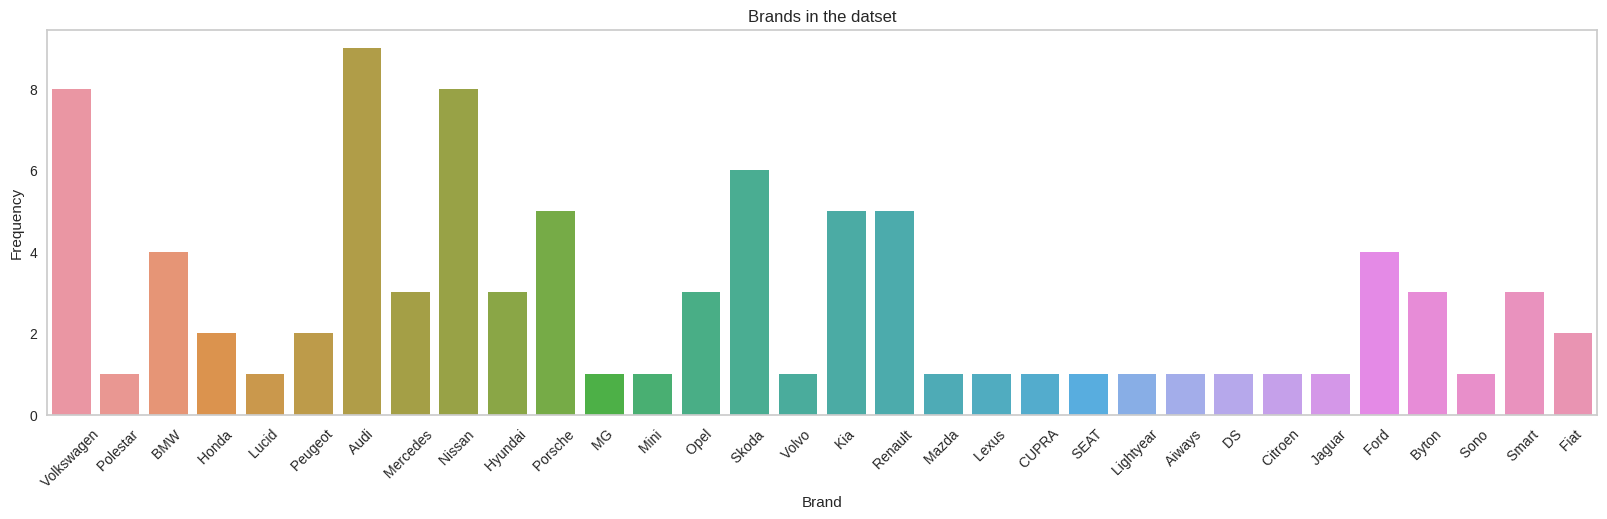

In [12]:
ax= plt.figure(figsize=(20,5))
sns.countplot(x='Brand',data=df)
plt.grid(axis='y')
plt.title('Brands in the datset')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

## Frequency Of Cars with Maximum Range

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Volkswagen '),
  Text(1, 0, 'Polestar '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Honda '),
  Text(4, 0, 'Lucid '),
  Text(5, 0, 'Peugeot '),
  Text(6, 0, 'Audi '),
  Text(7, 0, 'Mercedes '),
  Text(8, 0, 'Nissan '),
  Text(9, 0, 'Hyundai '),
  Text(10, 0, 'Porsche '),
  Text(11, 0, 'MG '),
  Text(12, 0, 'Mini '),
  Text(13, 0, 'Opel '),
  Text(14, 0, 'Skoda '),
  Text(15, 0, 'Volvo '),
  Text(16, 0, 'Kia '),
  Text(17, 0, 'Renault '),
  Text(18, 0, 'Mazda '),
  Text(19, 0, 'Lexus '),
  Text(20, 0, 'CUPRA '),
  Text(21, 0, 'SEAT '),
  Text(22, 0, 'Lightyear '),
  Text(23, 0, 'Aiways '),
  Text(24, 0, 'DS '),
  Text(25, 0, 'Citroen '),
  Text(26, 0, 'Jaguar '),
  Text(27, 0, 'Ford '),
  Text(28, 0, 'Byton '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Smart '),
  Text(31, 0, 'Fiat ')])

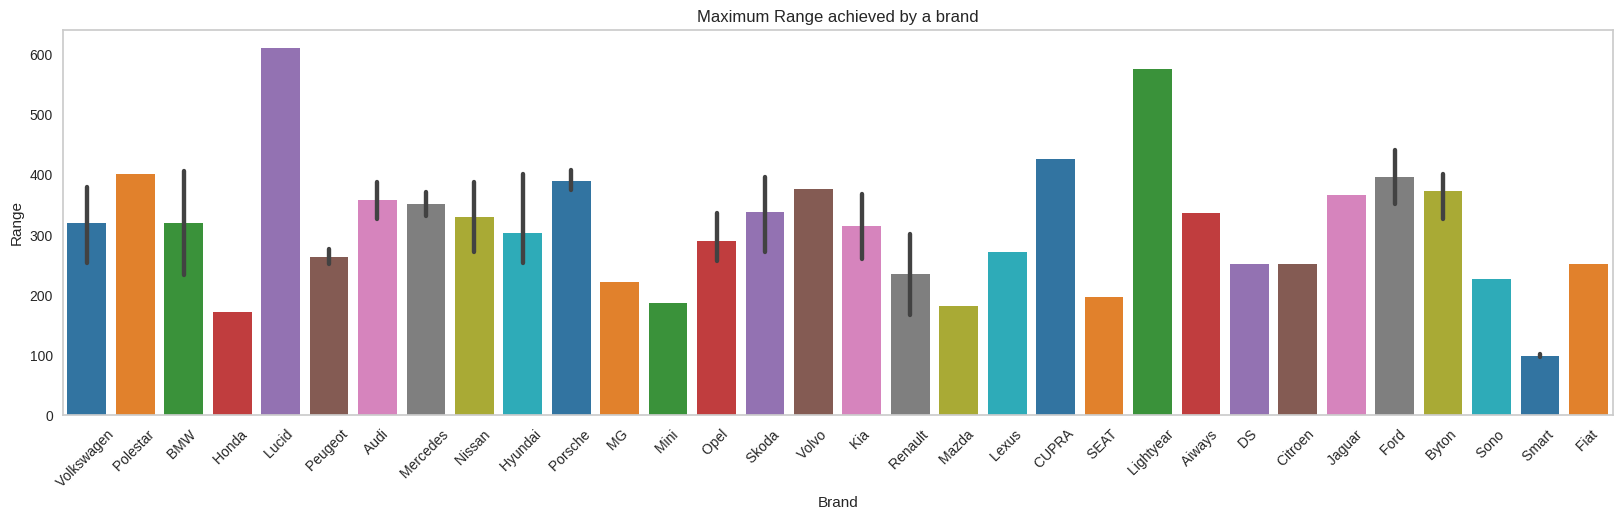

In [13]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df,palette='tab10')
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)

# Efficiency and Brand Relation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Volkswagen '),
  Text(1, 0, 'Polestar '),
  Text(2, 0, 'BMW '),
  Text(3, 0, 'Honda '),
  Text(4, 0, 'Lucid '),
  Text(5, 0, 'Peugeot '),
  Text(6, 0, 'Audi '),
  Text(7, 0, 'Mercedes '),
  Text(8, 0, 'Nissan '),
  Text(9, 0, 'Hyundai '),
  Text(10, 0, 'Porsche '),
  Text(11, 0, 'MG '),
  Text(12, 0, 'Mini '),
  Text(13, 0, 'Opel '),
  Text(14, 0, 'Skoda '),
  Text(15, 0, 'Volvo '),
  Text(16, 0, 'Kia '),
  Text(17, 0, 'Renault '),
  Text(18, 0, 'Mazda '),
  Text(19, 0, 'Lexus '),
  Text(20, 0, 'CUPRA '),
  Text(21, 0, 'SEAT '),
  Text(22, 0, 'Lightyear '),
  Text(23, 0, 'Aiways '),
  Text(24, 0, 'DS '),
  Text(25, 0, 'Citroen '),
  Text(26, 0, 'Jaguar '),
  Text(27, 0, 'Ford '),
  Text(28, 0, 'Byton '),
  Text(29, 0, 'Sono '),
  Text(30, 0, 'Smart '),
  Text(31, 0, 'Fiat ')])

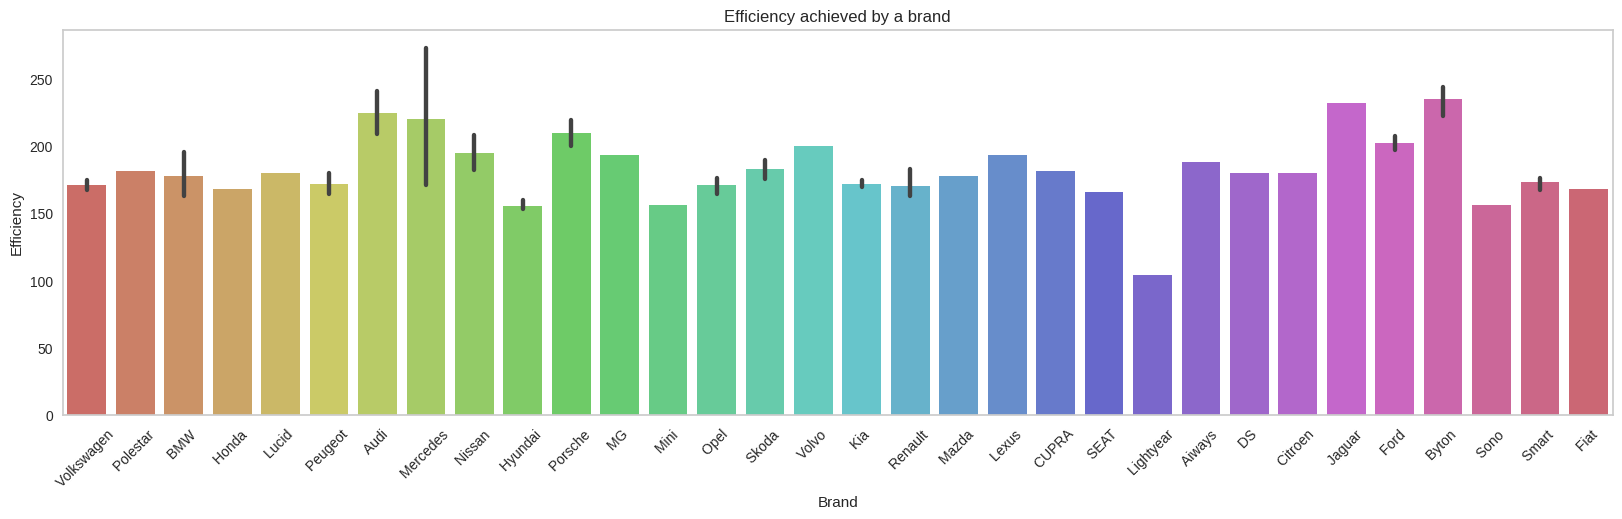

In [14]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df,palette='hls')
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)

# Number of Cars With Seats

Text(0.5, 1.0, 'Seats')

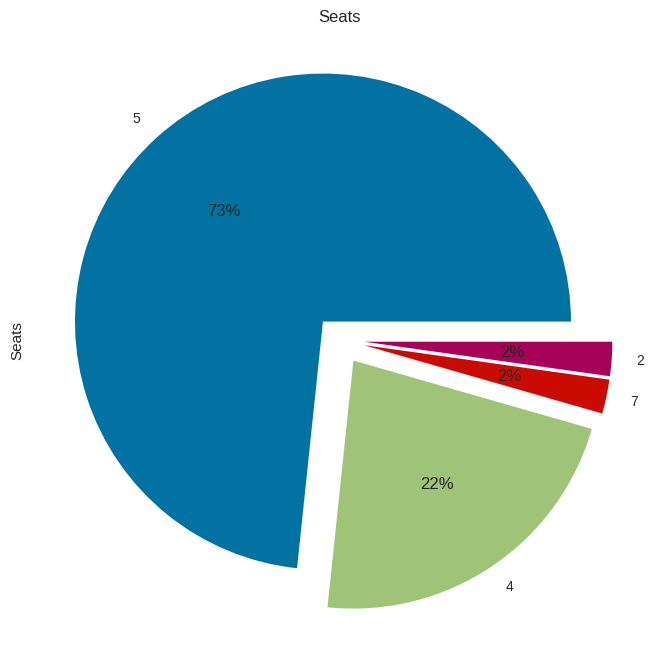

In [15]:
df['Seats'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(0.1,0.1,0.1,0.1))
plt.title('Seats')

# Relation Between Topspeed in Km/h and FastCharge

<Axes: xlabel='TopSpeed_KmH', ylabel='FastCharge_KmH'>

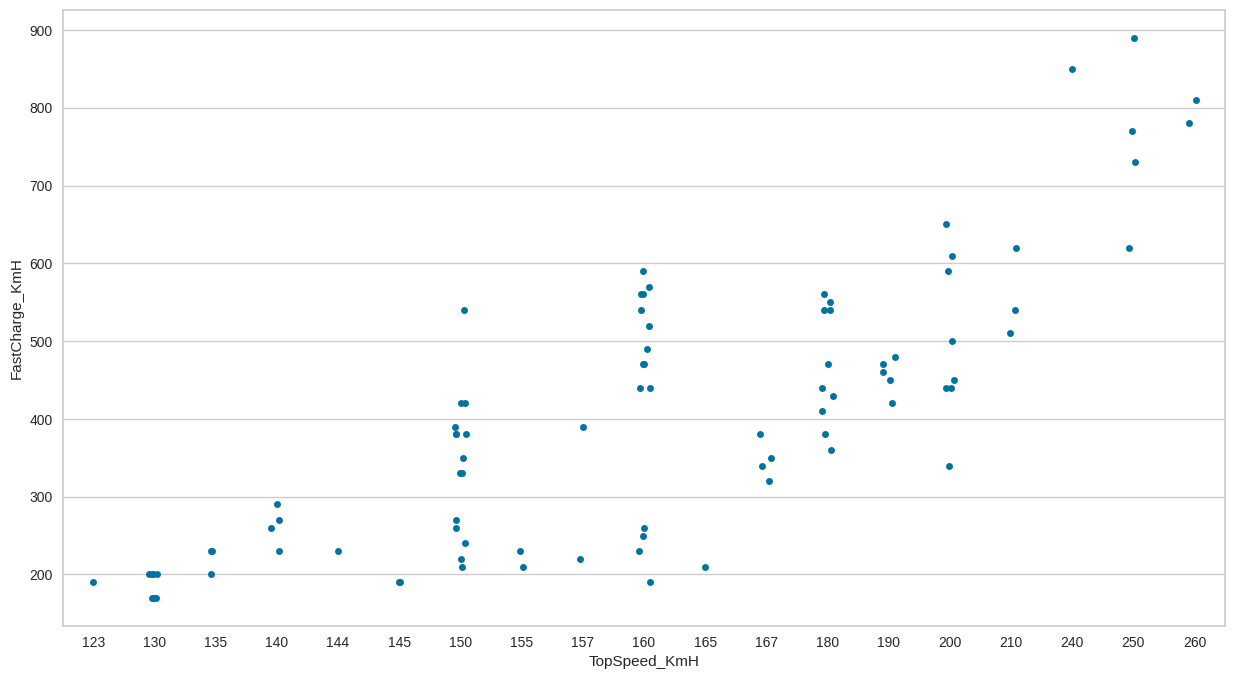

In [19]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='FastCharge_KmH', data=df, jitter=True)

In [21]:
df3= df[["TopSpeed_KmH", "Price(Inr)"]].groupby("TopSpeed_KmH").count()
df4= df[["Range_Km", "Price(Inr)"]].groupby("Range_Km").count()
df5= df[["Range_Km", "TopSpeed_KmH"]].groupby("Range_Km").count()
df3=df3.sort_values("TopSpeed_KmH",ascending = False).head(10)
df4=df4.sort_values("Range_Km",ascending = False).head(10)
df5=df5.sort_values("Range_Km",ascending = False).head(10)

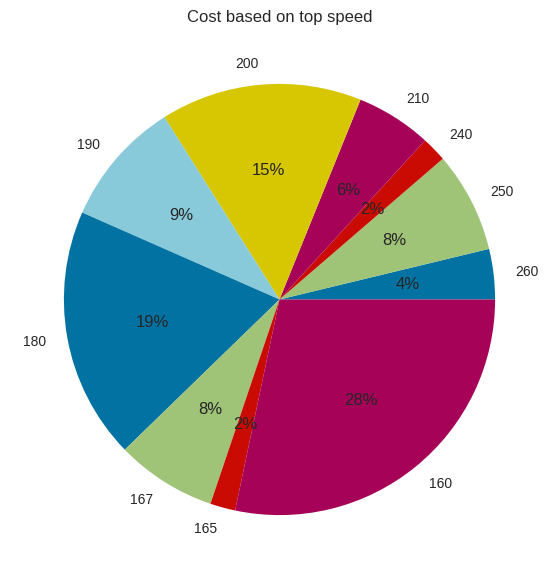

In [22]:
plt.figure(figsize=(10,7))
plt.title('Cost based on top speed')
plt.pie(x=df3["Price(Inr)"],labels=df3.index,autopct='%1.0f%%')
plt.show()


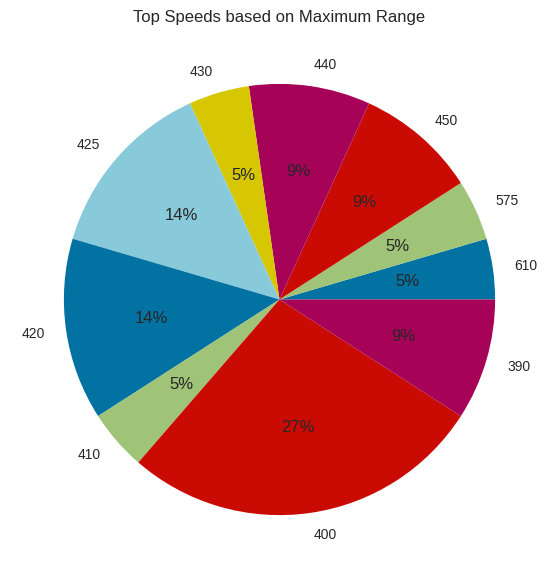

In [23]:
plt.figure(figsize=(10,7))
plt.title('Top Speeds based on Maximum Range')
plt.pie(x=df5["TopSpeed_KmH"],labels=df5.index,autopct='%1.0f%%')
plt.show()

# Relation Between Topspeed_KmH and Efficiency

<Axes: xlabel='TopSpeed_KmH', ylabel='Efficiency_WhKm'>

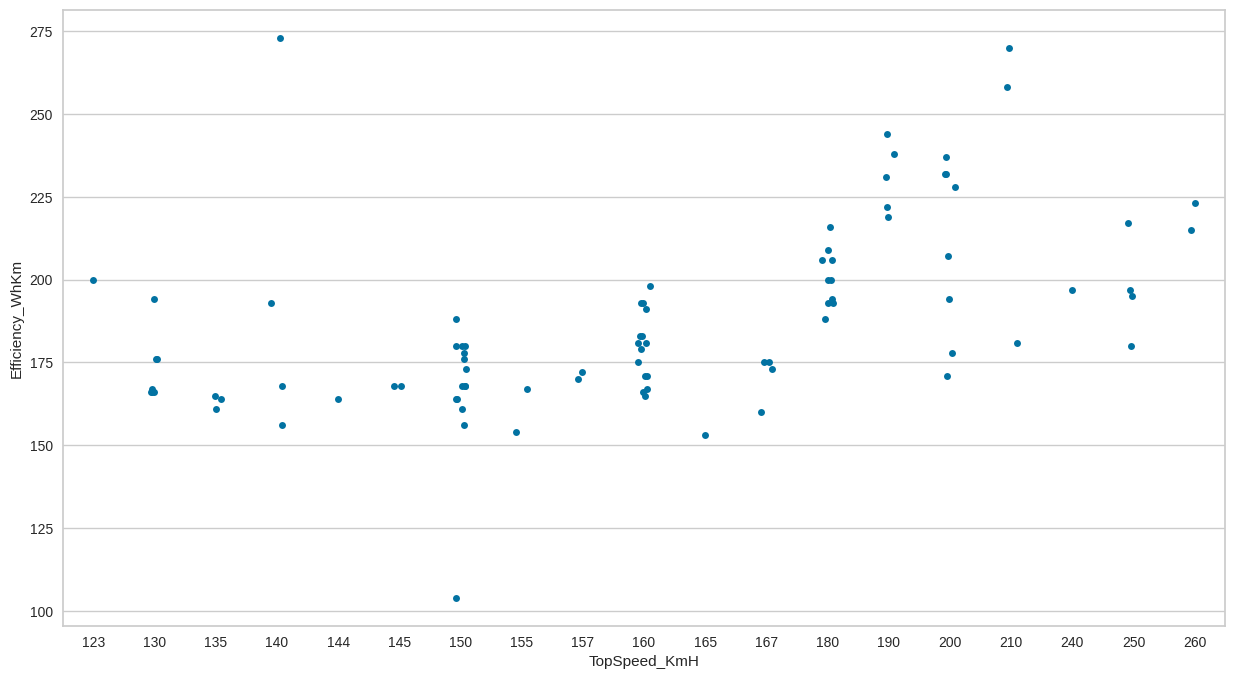

In [24]:
ax=plt.subplots(figsize=(15,8))
sns.stripplot(x='TopSpeed_KmH', y='Efficiency_WhKm', data=df, jitter=True)

In [25]:
features = ['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'RapidCharge','Range_Km', 'Seats', 'Price(Inr)']
x = df.loc[:, features].values
x = StandardScaler().fit_transform(x)

# PCA

In [26]:
pca = PCA(n_components=8)
t = pca.fit_transform(x)
data2 = pd.DataFrame(t, columns=['PC1', 'PC2','PC3','PC4','Pc5','PC6', 'PC7', 'PC8'])
data2.head()

,PC1,PC2,PC3,PC4,Pc5,PC6,PC7,PC8
0,-1.718179,0.283864,0.989976,1.022585,-0.046557,-0.498617,-0.100546,0.350761
1,2.019349,-0.221453,-0.733198,0.480240,-0.501757,-0.100658,-0.676782,0.318431
2,1.386810,-0.487154,-0.075369,-0.288874,0.179476,0.335744,-0.240462,-0.243761
3,-2.153554,0.627026,-0.915731,-1.079856,-0.117790,-0.291523,0.192985,-0.000511
4,4.335597,-0.120558,-0.961958,1.440853,-0.007821,-0.436555,0.693644,0.976748


# Dendrogram

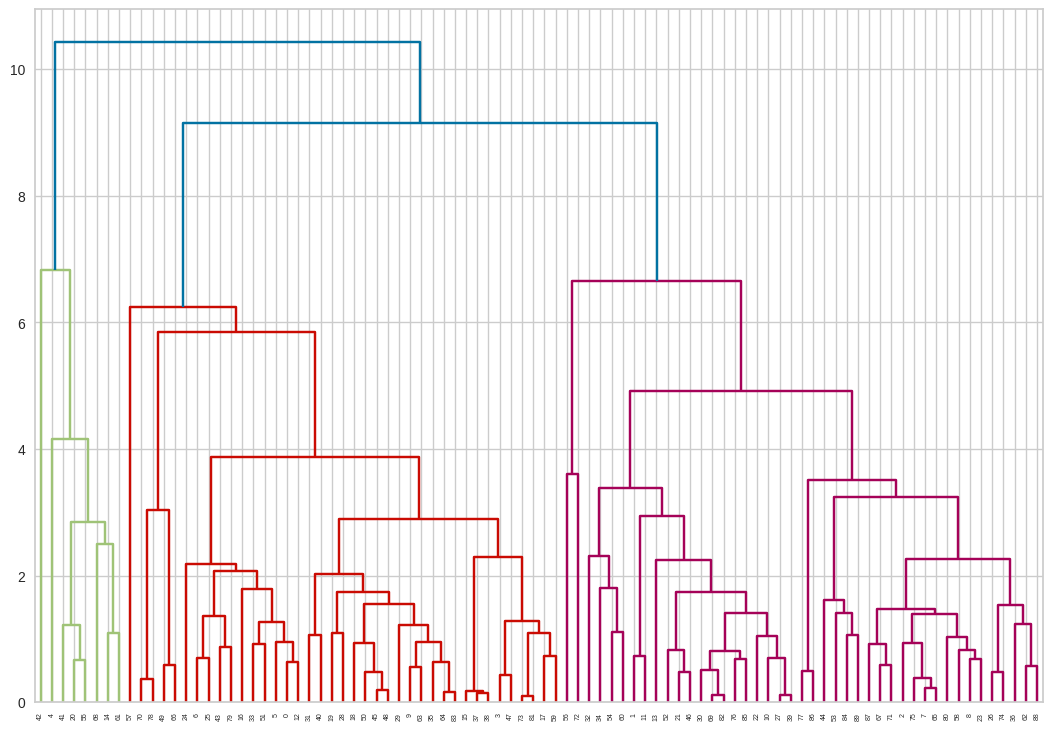

In [27]:
linked = linkage(data2, 'complete')
plt.figure(figsize=(13, 9))
dendrogram(linked, orientation='top')
plt.show()

# Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

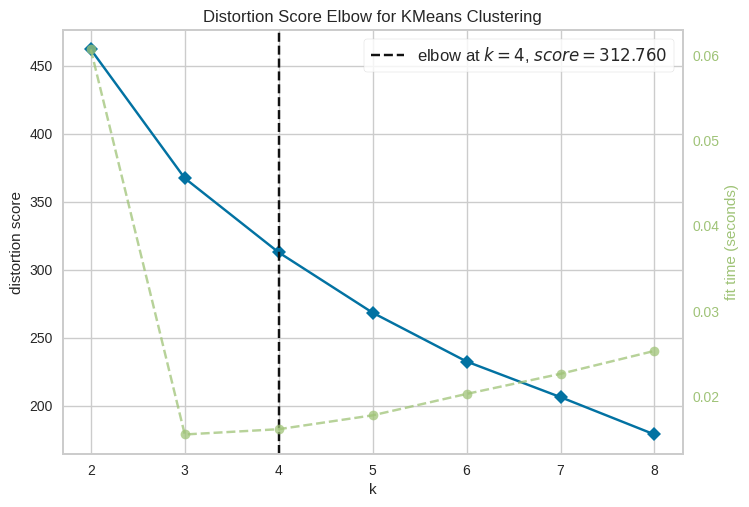

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,9), metric='distortion', timings=True)
visualizer.fit(t)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# KMeans Clustering

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(t)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares.
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 2 2 1 3 0 0 2 2 1 1 2 0 2 3 1 0 1 1 1 3 2 1 2 0 0 2 1 1 1 1 1 2 0 2 1 2
 1 1 1 1 3 2 0 2 1 2 1 1 0 1 0 2 2 2 3 1 0 2 1 2 3 2 1 1 2 0 2 3 1 0 2 2 1
 2 2 1 2 0 0 2 1 1 1 2 2 2 2 2 2]
310.95843396622115
5
[[-2.19088577  0.94580257  0.91787714  0.47753773  0.08293297 -0.10660652
  -0.05172242 -0.01905679]
 [-1.25919377 -0.40180056 -0.69381475 -0.24703788 -0.03863917 -0.12598605
  -0.027189    0.01082454]
 [ 1.26905286 -0.37494964  0.29440057  0.04138244 -0.13076875  0.24381162
   0.08975121 -0.03036551]
 [ 4.41878899  1.54971629 -0.39828319 -0.169111    0.64091886 -0.39944987
  -0.2062408   0.14590229]]


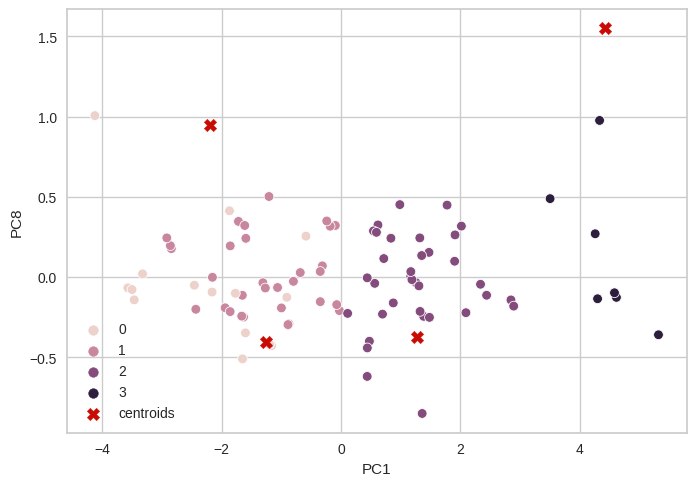

In [30]:
#Visulazing clusters
sns.scatterplot(data=data2, x="PC1", y="PC8", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()